In [25]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv(r'C:\Users\veron\OneDrive\Рабочий стол\weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [27]:
df.shape

(10000, 3)

In [28]:
df = df.drop_duplicates()
df.shape

(10000, 3)

In [29]:
df.isnull().mean() 

Gender    0.0
Height    0.0
Weight    0.0
dtype: float64

# уникальные значения

In [30]:
df.nunique()

Gender        2
Height    10000
Weight    10000
dtype: int64

# Перевод дюймов и фунтов в см и кг

In [31]:
hei = df.iloc[0:10000][['Height']]
h = hei * 2.54
print(h)

          Height
0     187.571423
1     174.706036
2     188.239668
3     182.196685
4     177.499761
...          ...
9995  168.078536
9996  170.350573
9997  162.224700
9998  175.346978
9999  157.338385

[10000 rows x 1 columns]


In [32]:
wei = df.iloc[0:10000][['Weight']]
w = wei * 0.45
print(w)

          Weight
0     108.852103
1      73.039713
2      95.733385
3      99.019112
4      92.857410
...          ...
9995   61.549854
9996   76.890558
9997   57.813893
9998   73.733608
9999   51.142096

[10000 rows x 1 columns]


In [33]:
df['Height'] = h
df['Weight'] = w
df

,Gender,Height,Weight
0,Male,187.571423,108.852103
1,Male,174.706036,73.039713
2,Male,188.239668,95.733385
3,Male,182.196685,99.019112
4,Male,177.499761,92.857410
...,...,...,...
9995,Female,168.078536,61.549854
9996,Female,170.350573,76.890558
9997,Female,162.224700,57.813893
9998,Female,175.346978,73.733608


In [34]:
new_df = df
new_df

,Gender,Height,Weight
0,Male,187.571423,108.852103
1,Male,174.706036,73.039713
2,Male,188.239668,95.733385
3,Male,182.196685,99.019112
4,Male,177.499761,92.857410
...,...,...,...
9995,Female,168.078536,61.549854
9996,Female,170.350573,76.890558
9997,Female,162.224700,57.813893
9998,Female,175.346978,73.733608


# Разделение датасета на 2 датафрейма по гендерному признаку.

# перевод категоиального признака в количественный с помощью метода LabelEncoder

In [37]:
from sklearn.preprocessing import LabelEncoder

In [39]:
g = LabelEncoder()
g.fit(new_df.Gender)
new_df['Gender'] = g.transform(new_df.Gender)
new_df

,Gender,Height,Weight
0,1,187.571423,108.852103
1,1,174.706036,73.039713
2,1,188.239668,95.733385
3,1,182.196685,99.019112
4,1,177.499761,92.857410
...,...,...,...
9995,0,168.078536,61.549854
9996,0,170.350573,76.890558
9997,0,162.224700,57.813893
9998,0,175.346978,73.733608


In [56]:
male = new_df.iloc[:5000]
female = new_df.iloc[5000:]

In [57]:
male

,Gender,Height,Weight
0,1,187.571423,108.852103
1,1,174.706036,73.039713
2,1,188.239668,95.733385
3,1,182.196685,99.019112
4,1,177.499761,92.857410
...,...,...,...
4995,1,174.904559,79.708973
4996,1,175.192494,71.678353
4997,1,170.215039,89.637930
4998,1,181.756605,83.657659


In [58]:
female

,Gender,Height,Weight
5000,0,149.633259,45.939747
5001,0,165.684232,63.587620
5002,0,160.957270,58.968631
5003,0,163.779193,57.677180
5004,0,156.954464,58.401633
...,...,...,...
9995,0,168.078536,61.549854
9996,0,170.350573,76.890558
9997,0,162.224700,57.813893
9998,0,175.346978,73.733608


# функция для определения количества записей в каждой коллекции, математического ожидания, стандартного отклонения, min и max значения по каждому из столбцов, разбиения на квантили

In [71]:
male.mean()

Gender      1.000000
Height    175.326919
Weight     84.159279
dtype: float64

In [74]:
male.count()

Gender    5000
Height    5000
Weight    5000
dtype: int64

In [73]:
male.min()

Gender      1.000000
Height    148.353539
Weight     50.806323
dtype: float64

In [75]:
male.max()

Gender      1.000000
Height    200.656806
Weight    121.495364
dtype: float64

In [76]:
male.std()

Gender    0.00000
Height    7.27294
Weight    8.90152
dtype: float64

In [77]:
male.quantile(0.25)

Gender      1.000000
Height    170.623685
Weight     78.249495
Name: 0.25, dtype: float64

In [78]:
male.quantile(0.50)

Gender      1.000000
Height    175.330380
Weight     84.165096
Name: 0.5, dtype: float64

In [79]:
male.quantile(0.75)

Gender      1.000000
Height    180.311409
Weight     90.161011
Name: 0.75, dtype: float64

In [80]:
female.mean()

Gender      0.000000
Height    161.820285
Weight     61.137042
dtype: float64

In [81]:
female.count()

Gender    5000
Height    5000
Weight    5000
dtype: int64

In [82]:
female.min()

Gender      0.000000
Height    137.828359
Weight     29.115057
dtype: float64

In [83]:
female.max()

Gender      0.000000
Height    186.409548
Weight     91.006746
dtype: float64

In [84]:
female.std()

Gender    0.000000
Height    6.848561
Weight    8.560111
dtype: float64

In [85]:
female.quantile(0.25)

Gender      0.000000
Height    157.211881
Weight     55.320343
Name: 0.25, dtype: float64

In [86]:
female.quantile(0.50)

Gender      0.000000
Height    161.876547
Weight     61.252912
Name: 0.5, dtype: float64

In [87]:
female.quantile(0.75)

Gender      0.000000
Height    166.531456
Weight     66.964917
Name: 0.75, dtype: float64

# визуализация роста и веса

Text(0, 0.5, 'Частота')

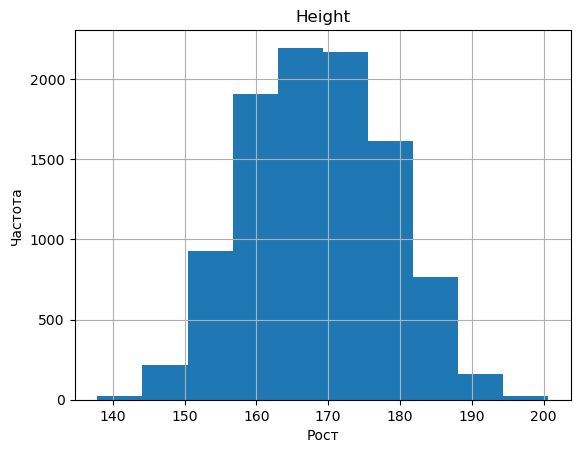

In [69]:
new_df.hist(column = 'Height')
plt.xlabel('Рост')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

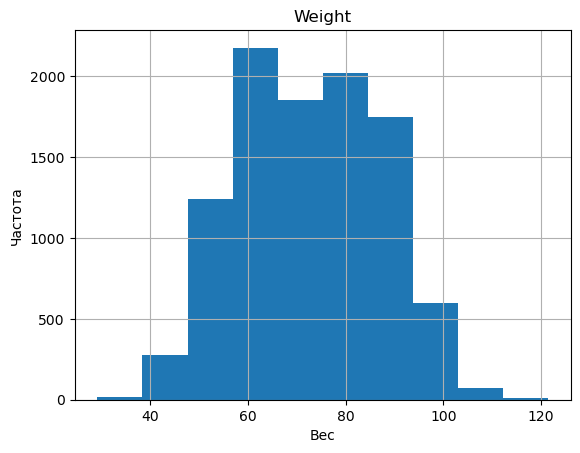

In [70]:
new_df.hist(column = 'Weight')
plt.xlabel('Вес')
plt.ylabel('Частота')

# метод describe

In [90]:
fun = male.describe(include = 'all')
print(fun)

       Gender       Height       Weight
count  5000.0  5000.000000  5000.000000
mean      1.0   175.326919    84.159279
std       0.0     7.272940     8.901520
min       1.0   148.353539    50.806323
25%       1.0   170.623685    78.249495
50%       1.0   175.330380    84.165096
75%       1.0   180.311409    90.161011
max       1.0   200.656806   121.495364


In [91]:
fun = female.describe(include = 'all')
print(fun)

       Gender       Height       Weight
count  5000.0  5000.000000  5000.000000
mean      0.0   161.820285    61.137042
std       0.0     6.848561     8.560111
min       0.0   137.828359    29.115057
25%       0.0   157.211881    55.320343
50%       0.0   161.876547    61.252912
75%       0.0   166.531456    66.964917
max       0.0   186.409548    91.006746


# Кластеризация

In [92]:
from sklearn.cluster import KMeans

In [95]:
df2=pd.read_csv(r'C:\Users\veron\OneDrive\Рабочий стол\weight-height.csv')
X = df2.iloc[:, [1, 2]].values


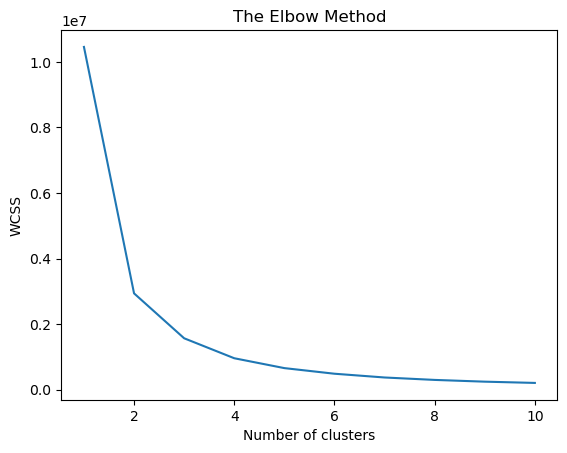

In [138]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 52)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [115]:
print(wcss)

[10456507.525427226, 2936583.2594811926, 1565617.283282204, 956730.8396173029, 655191.0202107751, 484219.2321039968, 369888.21134322154, 294661.31023183465, 241157.22968619986, 203594.7995147913]


In [116]:
for i in range(1, 10):
    cl = wcss[i] / wcss[i - 1]
    print(cl)

0.28083786602173477
0.5331424805434607
0.6110885781814988
0.6848227245113733
0.739050471033964
0.7638858327373909
0.7966226043317087
0.8184217653022087
0.844240911954886


In [117]:
clus = [0.2808344214840415, 0.5332823009996006, 0.6109177711471514, 0.6844594954572976, 0.7389530176551751, 0.7630231222559087, 0.7987782616563276, 0.8198993963722984, 0.8433531935629681] 
clus.append(cl)
max_i = 0
cul = 0
for i in range(1, 9):
    max_ii = clus[i] - clus[i - 1]
    if max_ii > max_i:
        max_i = max_ii
        cul = clus[i]
print(cul)
print(clus.index(cul) + 1)

0.5332823009996006
2


In [142]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 52)
y_kmeans = kmeans.fit_predict(X)

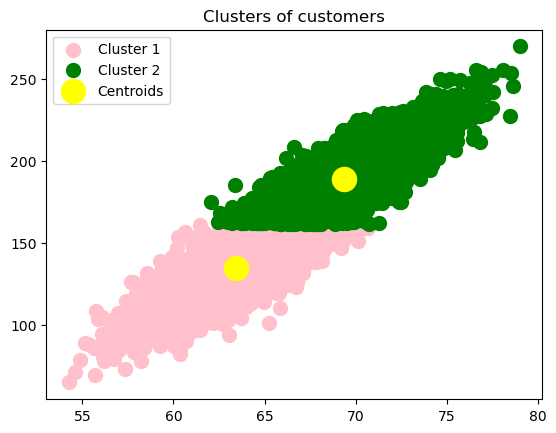

In [143]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [108]:
df=pd.read_csv(r'C:\Users\veron\OneDrive\Рабочий стол\weight-height.csv')
X = df.iloc[:, [1, 2]].values

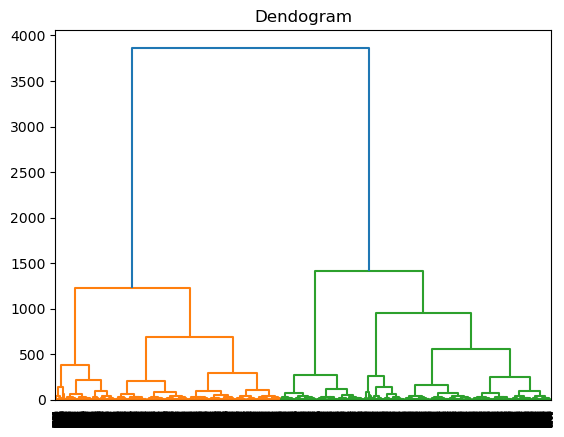

In [109]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.show()

In [120]:
from sklearn.cluster import AgglomerativeClustering


In [133]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

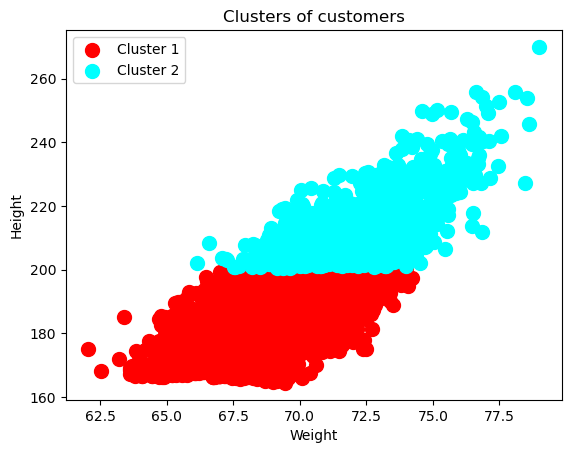

In [144]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')


plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 2')

plt.title('Clusters of customers')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

# Функция предсказания